<p style="background-color:#87CEEB;font-family:Arial, sans-serif;font-size:120%;color:black;text-align:center;border-radius:25px; padding:15px;border: 3px solid #4682B4;">Import Libraries</p>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette("Set2")
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


<p style="background-color:#87CEEB;font-family:Arial, sans-serif;font-size:120%;color:black;text-align:center;border-radius:25px; padding:15px;border: 3px solid #4682B4;">Reading Data</p>


In [2]:
df = pd.read_csv("Dataset-Mental-Disorders.csv")
df.head()

,Patient Number,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,Patiant-01,Usually,Seldom,Sometimes,Sometimes,YES,YES,NO,NO,YES,NO,NO,YES,YES,YES,3 From 10,3 From 10,4 From 10,Bipolar Type-2
1,Patiant-02,Usually,Seldom,Usually,Sometimes,NO,YES,NO,NO,NO,NO,NO,NO,NO,NO,4 From 10,2 From 10,5 From 10,Depression
2,Patiant-03,Sometimes,Most-Often,Sometimes,Sometimes,YES,NO,NO,NO,YES,YES,NO,YES,YES,NO,6 From 10,5 From 10,7 From 10,Bipolar Type-1
3,Patiant-04,Usually,Seldom,Usually,Most-Often,YES,YES,YES,NO,YES,NO,NO,NO,NO,NO,3 From 10,2 From 10,2 From 10,Bipolar Type-2
4,Patiant-05,Usually,Usually,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,YES,YES,5 From 10,5 From 10,6 From 10,Normal


**We are dropping not necessary columns like patient number**

In [3]:
# unecessary column
df = df[df.drop('Patient Number', axis=1).columns]

# check for missing values
missing_values = df.isnull().sum()
print(f"\nMissing values in each column:\n{missing_values}")


Missing values in each column:
Sadness                0
Euphoric               0
Exhausted              0
Sleep dissorder        0
Mood Swing             0
Suicidal thoughts      0
Anorxia                0
Authority Respect      0
Try-Explanation        0
Aggressive Response    0
Ignore & Move-On       0
Nervous Break-down     0
Admit Mistakes         0
Overthinking           0
Sexual Activity        0
Concentration          0
Optimisim              0
Expert Diagnose        0
dtype: int64


<p style="background-color:#87CEEB;font-family:Arial, sans-serif;font-size:120%;color:black;text-align:center;border-radius:25px; padding:15px;border: 3px solid #4682B4;">Data Understanding & Preparation</p>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sadness              120 non-null    object
 1   Euphoric             120 non-null    object
 2   Exhausted            120 non-null    object
 3   Sleep dissorder      120 non-null    object
 4   Mood Swing           120 non-null    object
 5   Suicidal thoughts    120 non-null    object
 6   Anorxia              120 non-null    object
 7   Authority Respect    120 non-null    object
 8   Try-Explanation      120 non-null    object
 9   Aggressive Response  120 non-null    object
 10  Ignore & Move-On     120 non-null    object
 11  Nervous Break-down   120 non-null    object
 12  Admit Mistakes       120 non-null    object
 13  Overthinking         120 non-null    object
 14  Sexual Activity      120 non-null    object
 15  Concentration        120 non-null    object
 16  Optimisi

## Descriptive Analysis

In [5]:
df.describe()

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
count,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120,120
unique,4,4,4,4,2,3,2,2,2,2,2,2,2,2,9,8,9,4
top,Usually,Seldom,Sometimes,Sometimes,NO,NO,NO,NO,NO,NO,NO,YES,NO,YES,5 From 10,4 From 10,6 From 10,Bipolar Type-2
freq,42,46,38,44,63,63,74,73,63,62,70,62,61,65,22,33,21,31


In [6]:
df['Expert Diagnose'].value_counts()

Expert Diagnose
Bipolar Type-2    31
Depression        31
Normal            30
Bipolar Type-1    28
Name: count, dtype: int64

In [7]:
df['Suicidal thoughts'].value_counts()

Suicidal thoughts
NO      63
YES     56
YES      1
Name: count, dtype: int64

In [8]:
df['Suicidal thoughts'] = df['Suicidal thoughts'].replace('YES ', "YES")

In [9]:
# encode
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in df.columns:
    df[column] = label_encoder.fit_transform(df[column])
    
df.head(5)

,Sadness,Euphoric,Exhausted,Sleep dissorder,Mood Swing,Suicidal thoughts,Anorxia,Authority Respect,Try-Explanation,Aggressive Response,Ignore & Move-On,Nervous Break-down,Admit Mistakes,Overthinking,Sexual Activity,Concentration,Optimisim,Expert Diagnose
0,3,1,2,2,1,1,0,0,1,0,0,1,1,1,2,2,3,1
1,3,1,3,2,0,1,0,0,0,0,0,0,0,0,3,1,4,2
2,2,0,2,2,1,0,0,0,1,1,0,1,1,0,5,4,6,0
3,3,1,3,0,1,1,1,0,1,0,0,0,0,0,2,1,1,1
4,3,3,2,2,0,0,0,0,0,0,0,1,1,1,4,4,5,3


<p style="background-color:#87CEEB;font-family:Arial, sans-serif;font-size:120%;color:black;text-align:center;border-radius:25px; padding:15px;border: 3px solid #4682B4;">Exploratory Data Analysis</p>
<a id="about"></a>

## Statistical Analysis

In [10]:
pip install tabulate

Note: you may need to restart the kernel to use updated packages.


In [11]:
from tabulate import tabulate

def calculate_statistical_moments(data_copy):
    """
    Calculate statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - data_copy (DataFrame): Input data_copy containing features.

    Returns:
    - DataFrame: DataFrame containing statistical moments for each feature.
    """
    # Select only the top 12 features
    data_copy = data_copy.iloc[:, :15]
    
    moments = {
        'Mean': data_copy.mean(),
        'Median': data_copy.median(),
        'Standard Deviation': data_copy.std(),
        'Skewness': data_copy.skew(),
        'Kurtosis': data_copy.kurtosis()
    }
    moments_df = pd.DataFrame(moments)
    return moments_df

def display_statistical_moments(data_copy):
    """
    Display statistical moments (mean, median, standard deviation, skewness, kurtosis) for each feature in the dataset.

    Parameters:
    - data_copy (DataFrame): Input data_copy containing features.
    """
    moments_df = calculate_statistical_moments(data_copy)
    print("\nStatistical Moments:\n")
    print(tabulate(moments_df, headers='keys', tablefmt='grid', showindex=True, numalign="center", stralign='center'))

display_statistical_moments(df)



Statistical Moments:

+---------------------+----------+----------+----------------------+------------+------------+
|                     |   Mean   |  Median  |  Standard Deviation  |  Skewness  |  Kurtosis  |
+=====================+==========+==========+======================+============+============+
|       Sadness       | 1.88333  |    2     |       1.07049        | -0.599678  |  -0.87858  |
+---------------------+----------+----------+----------------------+------------+------------+
|      Euphoric       | 1.63333  |    2     |       0.849452       | 0.0330279  | -0.666093  |
+---------------------+----------+----------+----------------------+------------+------------+
|      Exhausted      | 1.63333  |    2     |       1.14447        | -0.265839  |  -1.34773  |
+---------------------+----------+----------+----------------------+------------+------------+
|   Sleep dissorder   | 1.75833  |    2     |       1.05317        | -0.421472  |  -1.00357  |
+---------------------+----

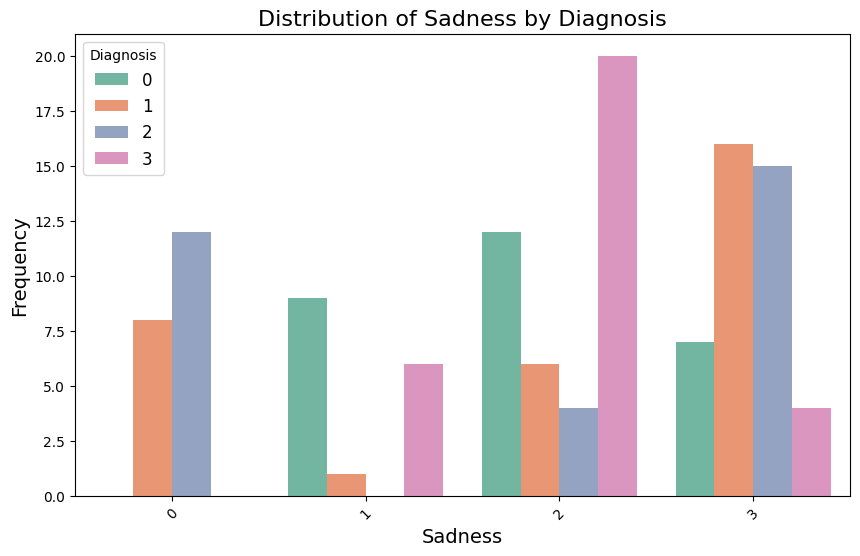

In [12]:
# Plot stacked bar plot for comparing categorical variables across diagnostic categories
def plot_stacked_bar(data, category_column, diagnosis_column):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=category_column, hue=diagnosis_column, palette='Set2')
    plt.title(f'Distribution of {category_column} by Diagnosis', fontsize=16)
    plt.xlabel(category_column, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title='Diagnosis', fontsize=12)
    plt.show()

# Example usage:
plot_stacked_bar(df, 'Sadness', 'Expert Diagnose')


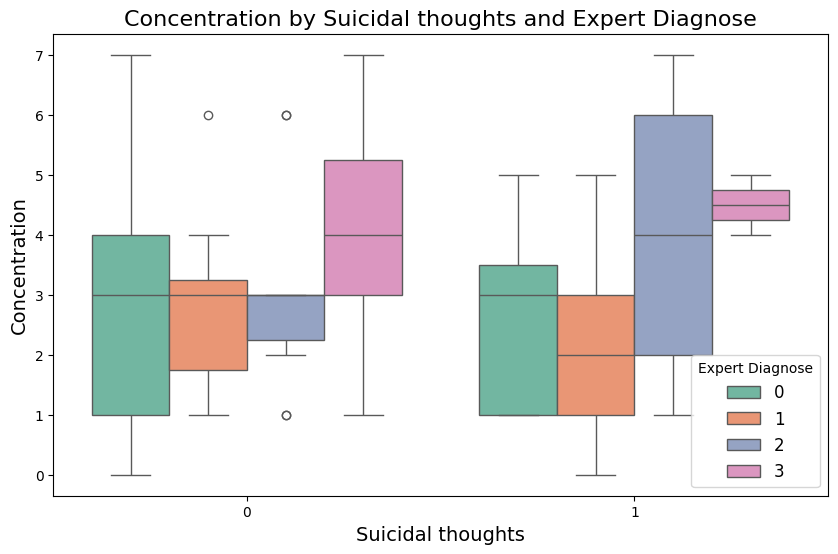

In [13]:
# Plot box plot with hue for a continuous variable across different categories
def plot_box_with_hue(data, x_column, y_column, hue_column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x=x_column, y=y_column, hue=hue_column, palette='Set2')
    plt.title(f'{y_column} by {x_column} and {hue_column}', fontsize=16)
    plt.xlabel(x_column, fontsize=14)
    plt.ylabel(y_column, fontsize=14)
    plt.legend(title=hue_column, fontsize=12)
    plt.show()

# Example usage:
plot_box_with_hue(df, 'Suicidal thoughts', 'Concentration', 'Expert Diagnose')


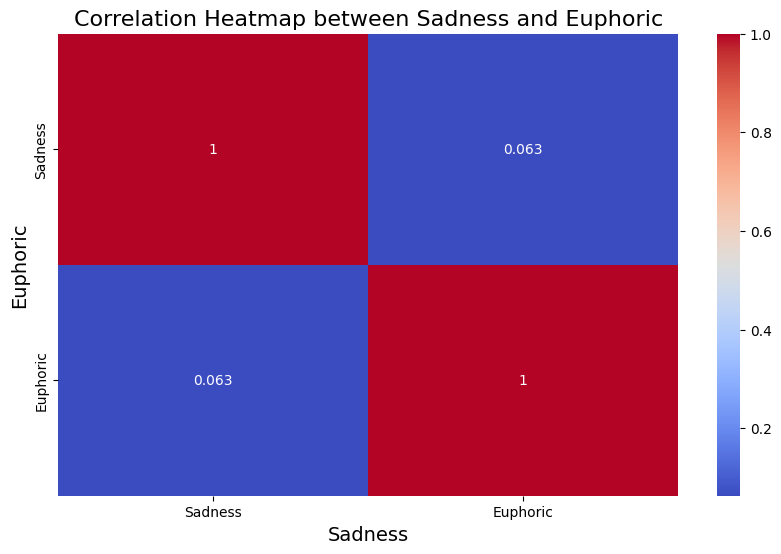

In [14]:
# Plot heatmap for correlation matrix between two continuous variables
def plot_heatmap(data, x_column, y_column):
    plt.figure(figsize=(10, 6))
    sns.heatmap(data[[x_column, y_column]].corr(), annot=True, cmap='coolwarm')
    plt.title(f'Correlation Heatmap between {x_column} and {y_column}', fontsize=16)
    plt.xlabel(x_column, fontsize=14)
    plt.ylabel(y_column, fontsize=14)
    plt.show()

# Example usage:
plot_heatmap(df,'Sadness', 'Euphoric')


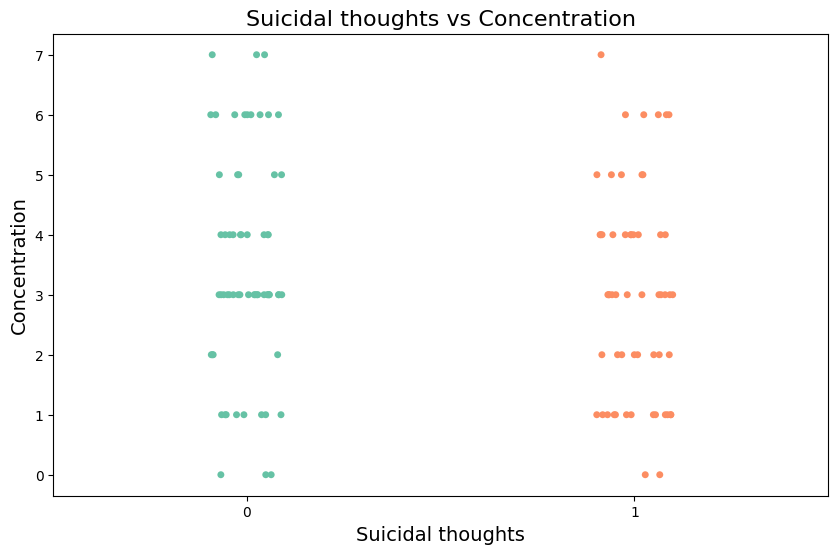

In [15]:
# Plot scatter plot for a continuous variable against a categorical variable
def plot_scatter_with_categorical(data, x_column, y_column):
    plt.figure(figsize=(10, 6))
    sns.stripplot(data=data, x=x_column, y=y_column, jitter=True, palette='Set2')
    plt.title(f'{x_column} vs {y_column}', fontsize=16)
    plt.xlabel(x_column, fontsize=14)
    plt.ylabel(y_column, fontsize=14)
    plt.show()

# Example usage:
plot_scatter_with_categorical(df, 'Suicidal thoughts', 'Concentration')

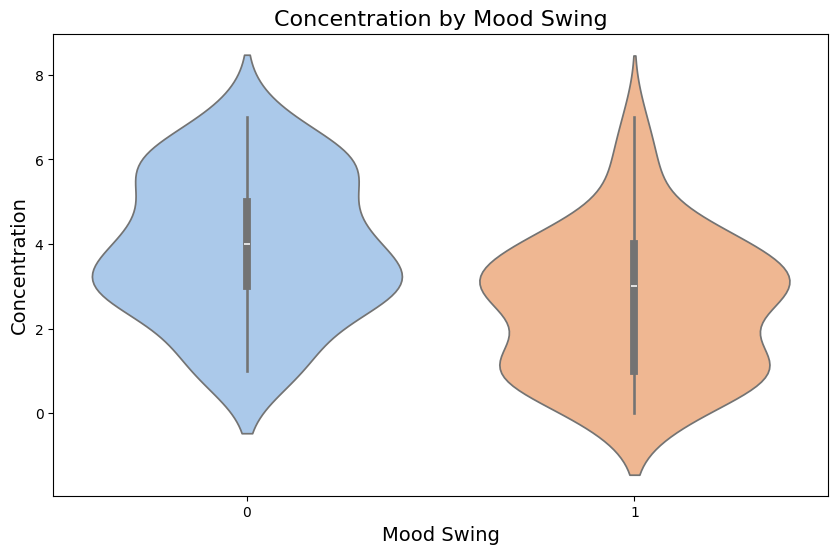

In [16]:
# Plot violin plot for a continuous variable across different categories of another variable
def plot_violin(data, x_column, y_column):
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=data, x=x_column, y=y_column, palette='pastel')
    plt.title(f'{y_column} by {x_column}', fontsize=16)
    plt.xlabel(x_column, fontsize=14)
    plt.ylabel(y_column, fontsize=14)
    plt.show()

# Example usage:
plot_violin(df, 'Mood Swing', 'Concentration')


<Figure size 1200x1000 with 0 Axes>

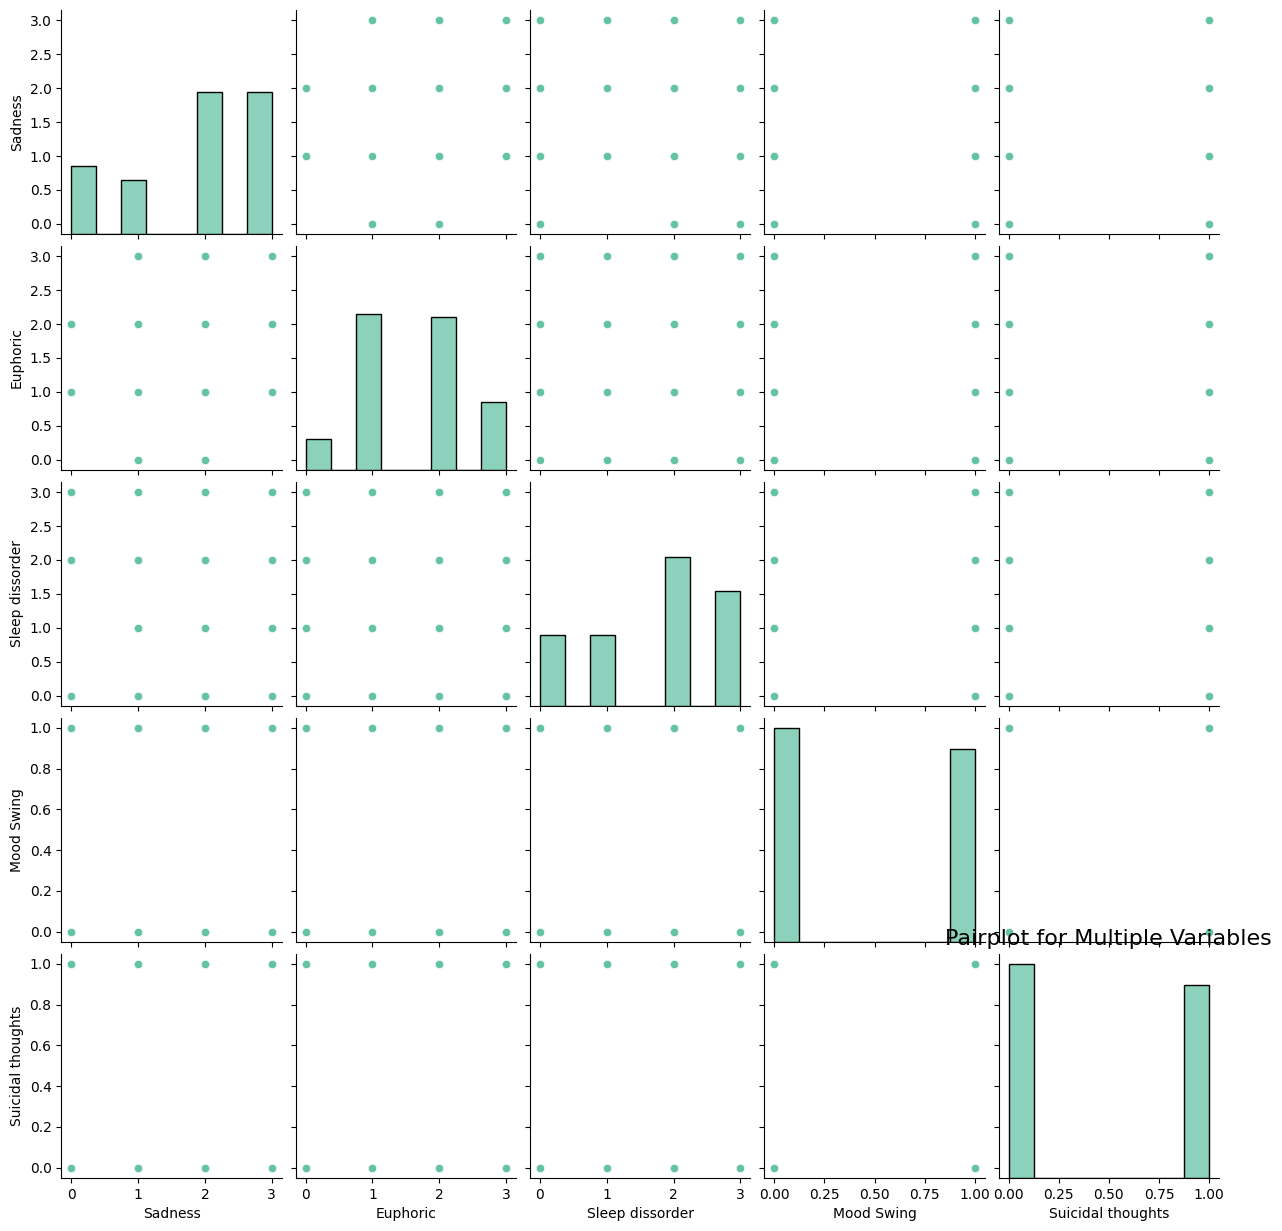

In [17]:
# Plot pairplot for multiple pairs of variables
def plot_pairplot(data, columns):
    plt.figure(figsize=(12, 10))
    sns.pairplot(data[columns])
    plt.title('Pairplot for Multiple Variables', fontsize=16)
    plt.show()

# Example usage:
columns_for_pairplot = ['Sadness', 'Euphoric', 'Sleep dissorder', 'Mood Swing', 'Suicidal thoughts']
plot_pairplot(df, columns_for_pairplot)


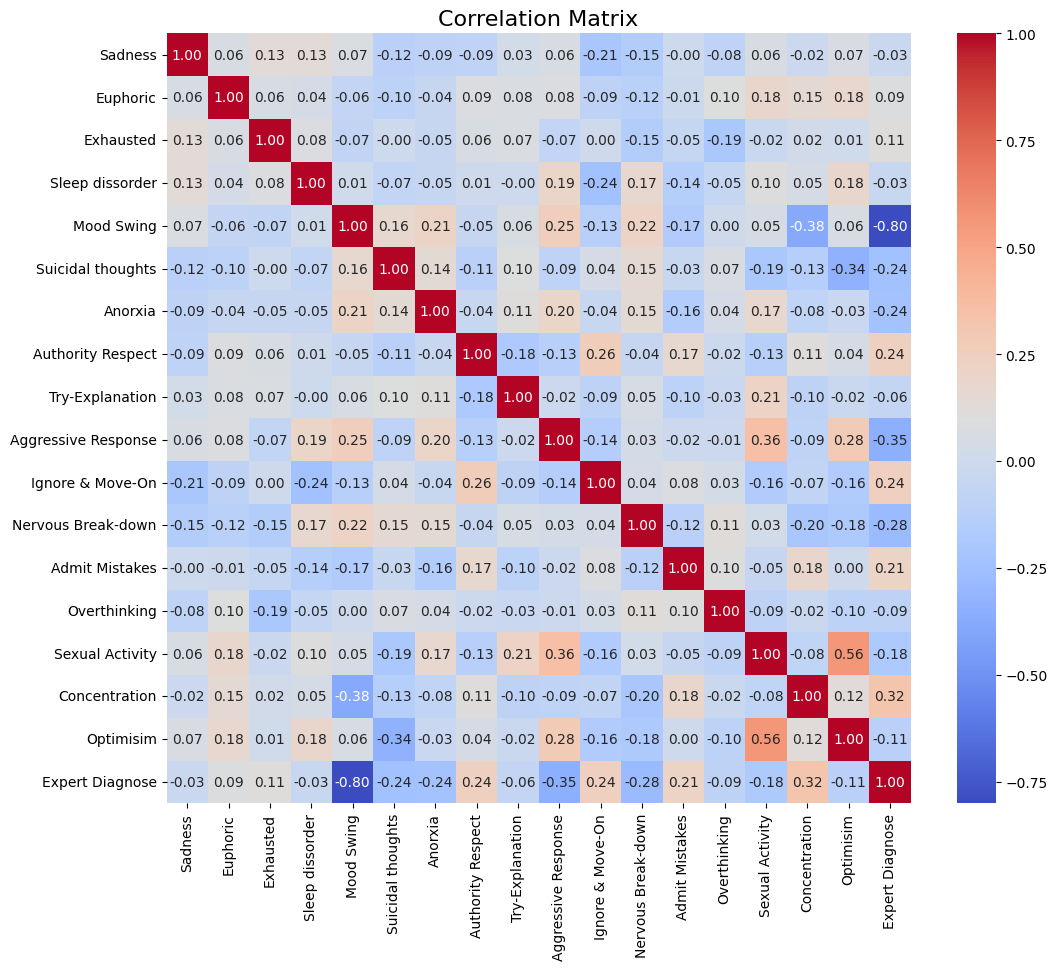

In [18]:
def plot_correlation_matrix(data):
    """
    Plot a correlation matrix for the entire DataFrame.

    Parameters:
    - data (DataFrame): Input DataFrame.

    Returns:
    - None
    """
    # Calculate correlation matrix
    correlation_matrix = data.corr()

    # Set up the figure and axes
    plt.figure(figsize=(12, 10))

    # Plot correlation matrix heatmap
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"fontsize": 10})

    # Add title
    plt.title('Correlation Matrix', fontsize=16)

    # Show plot
    plt.show()

# Example usage:
plot_correlation_matrix(df)


<p style="background-color:#87CEEB;font-family:Arial, sans-serif;font-size:120%;color:black;text-align:center;border-radius:25px; padding:15px;border: 3px solid #4682B4;">Data Splitting</p>

In [19]:
X = df.drop(columns=['Expert Diagnose'],axis=1)
y = df['Expert Diagnose']

In [20]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=67)

In [21]:
pip install imbalanced-learn

   ---------------------------------------- 0.0/258.0 kB ? eta -:--:--
   - -------------------------------------- 10.2/258.0 kB ? eta -:--:--
   ---------------------------------- ----- 225.3/258.0 kB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 258.0/258.0 kB 2.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [22]:
# resample
from imblearn.over_sampling import RandomOverSampler

smote = RandomOverSampler()
X_train, y_train = smote.fit_resample(X_train, y_train)

Ensure that the training set remains unchanged.

In [23]:
X_train.shape

(108, 17)

In [24]:
y_train.shape

(108,)

In [25]:
X_test.shape

(24, 17)

In [26]:
y_test.shape

(24,)

<p style="background-color:#87CEEB;font-family:Arial, sans-serif;font-size:120%;color:black;text-align:center;border-radius:25px; padding:15px;border: 3px solid #4682B4;">Model Building</p>
<a id="about"></a>

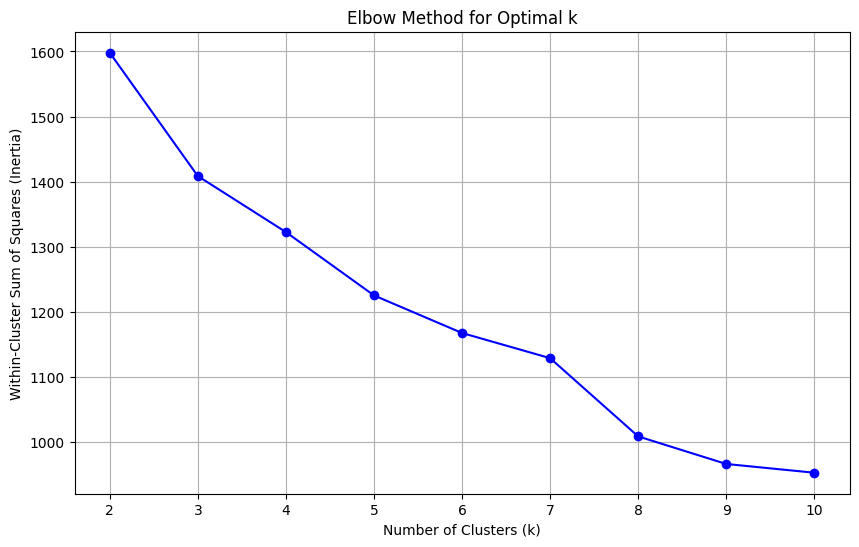

In [27]:
def plot_elbow_curve(X, min_clusters=2, max_clusters=10):
    """
    Plot the elbow curve to determine the optimal number of clusters using the KMeans algorithm.

    Parameters:
    - X (DataFrame): Input features.
    - min_clusters (int): Minimum number of clusters to test.
    - max_clusters (int): Maximum number of clusters to test.

    Returns:
    - None
    """
    # Initialize lists to store inertia values
    inertia_values = []

    # Test different values of k (number of clusters)
    k_values = range(min_clusters, max_clusters + 1)

    for k in k_values:
        # Create KMeans clustering model
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)

        # Append the inertia value to the list
        inertia_values.append(kmeans.inertia_)

    # Plotting the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, inertia_values, marker='o', linestyle='-', color='b')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
    plt.title('Elbow Method for Optimal k')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

# Example usage:
plot_elbow_curve(X)


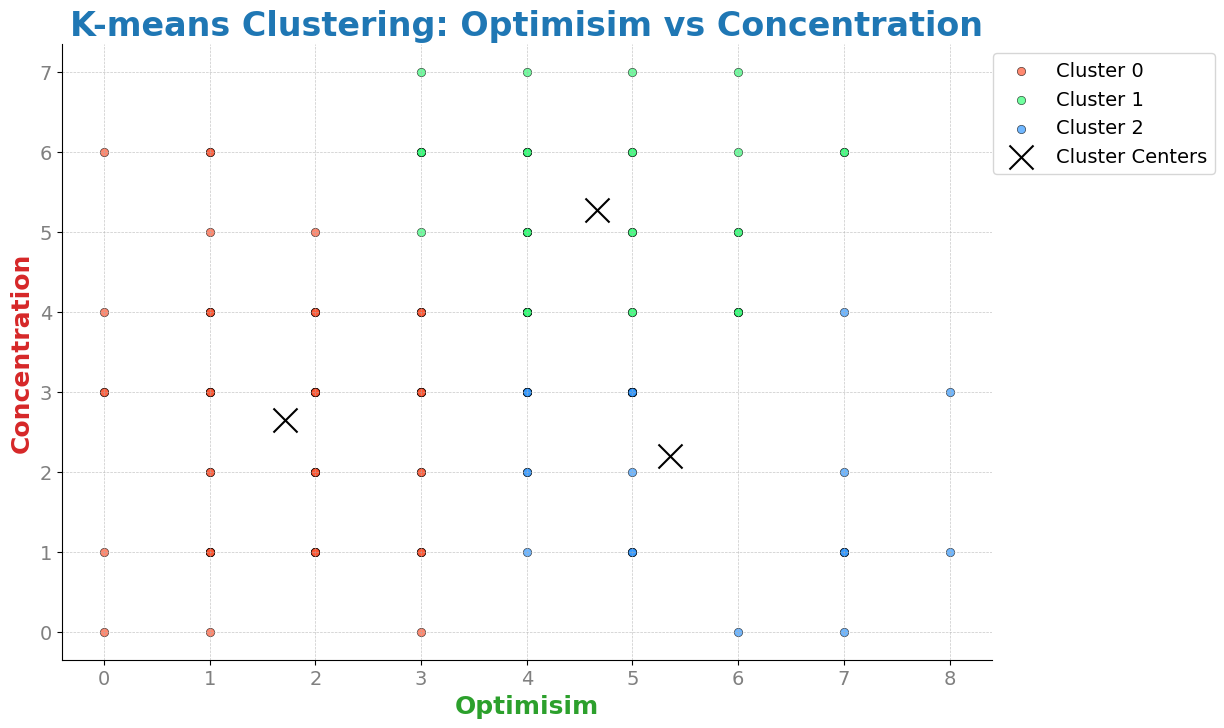

In [28]:
def plot_kmeans_clusters(X, x_col, y_col, num_clusters=4):
    """
    Plot clusters using K-means clustering.

    Parameters:
    - X (DataFrame): Input DataFrame containing features.
    - x_col (str): Column name for x-axis.
    - y_col (str): Column name for y-axis.
    - num_clusters (int): Number of clusters for K-means.

    Returns:
    - None
    """
    # Initialize KMeans model
    km = KMeans(n_clusters=num_clusters, random_state=42)
    
    # Fit K-means and assign cluster labels
    X['cluster'] = km.fit_predict(X[[x_col, y_col]])
    
    # Plot clusters with cluster centers
    plt.figure(figsize=(12, 8))
    
    # Define colors for each cluster
    colors = ['#FF5733', '#33FF77', '#3399FF', '#FF33EA']
    
    # Plot each cluster using a different color
    for cluster_label, color in zip(sorted(X['cluster'].unique()), colors):
        cluster_data = X[X['cluster'] == cluster_label]
        plt.scatter(cluster_data[x_col], cluster_data[y_col], label=f'Cluster {cluster_label}', alpha=0.7, color=color, edgecolors='black', linewidth=0.5)
    
    # Plot cluster centers
    cluster_centers = km.cluster_centers_
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=300, c='black', label='Cluster Centers')
    
    # Set plot title and labels
    plt.title(f'K-means Clustering: {x_col.capitalize()} vs {y_col.capitalize()}', fontsize=24, fontweight='bold', color='#1f77b4')
    plt.xlabel(x_col.capitalize(), fontsize=18, fontweight='bold', color='#2ca02c')
    plt.ylabel(y_col.capitalize(), fontsize=18, fontweight='bold', color='#d62728')
    
    # Add legend
    plt.legend(fontsize=14, loc='upper right', bbox_to_anchor=(1.25, 1))
    
    # Add grid
    plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
    
    # Remove top and right spines
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    
    # Increase tick label font size and color
    plt.xticks(fontsize=14, color='gray')
    plt.yticks(fontsize=14, color='gray')
    
    # Show the plot
    plt.show()

# Example usage:
plot_kmeans_clusters(X, 'Optimisim', 'Concentration', num_clusters=3)


In [29]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

def evaluate_random_forest(X_train, X_test, y_train, y_test):
    """
    Perform Random Forest Classifier model evaluation.

    Parameters:
    - X_train (array-like): Training features.
    - X_test (array-like): Testing features.
    - y_train (array-like): Training target labels.
    - y_test (array-like): Testing target labels.

    Returns:
    - accuracy_rf (float): Accuracy score of the Random Forest model.
    - report_rf (str): Classification report of the Random Forest model.
    - y_pred_rf (array-like): Predictions made by the Random Forest model.
    """
    # Define hyperparameter grid
    rf_param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 10, 15],
        'min_samples_leaf': [1, 4, 5],
        'max_features': ['sqrt', 'log2']
    }

    # Initialize Random Forest Classifier
    rf_classifier = RandomForestClassifier()

    # Perform RandomizedSearchCV
    rf_random_search = RandomizedSearchCV(rf_classifier, param_distributions=rf_param_grid, n_iter=45, scoring='accuracy', cv=5, n_jobs=-1, random_state=67)
    rf_random_search.fit(X_train, y_train)

    # Get the best Random Forest model
    best_rf_model = rf_random_search.best_estimator_

    # Make predictions on the test set
    y_pred_rf = best_rf_model.predict(X_test)

    # Calculate accuracy and classification report
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    report_rf = classification_report(y_test, y_pred_rf)

    # Print evaluation metrics
    print("Random Forest Classifier:\n")
    print(f"Best Hyperparameters: {rf_random_search.best_params_}")
    print(f"\nAccuracy: {accuracy_rf:.4f}\n\nClassification Report:\n{report_rf}")

    # Return evaluation metrics
    return accuracy_rf, report_rf, y_pred_rf

# Example usage:
accuracy_rf, report_rf, y_pred_rf = evaluate_random_forest(X_train, X_test, y_train, y_test)


Random Forest Classifier:

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': None}

Accuracy: 0.9167

Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       1.00      0.92      0.96        12
           2       1.00      0.75      0.86         4
           3       0.75      1.00      0.86         3

    accuracy                           0.92        24
   macro avg       0.90      0.92      0.89        24
weighted avg       0.93      0.92      0.92        24



<p style="background-color:#87CEEB;font-family:Arial, sans-serif;font-size:120%;color:black;text-align:center;border-radius:25px; padding:15px;border: 3px solid #4682B4;">Model Evaluation</p>

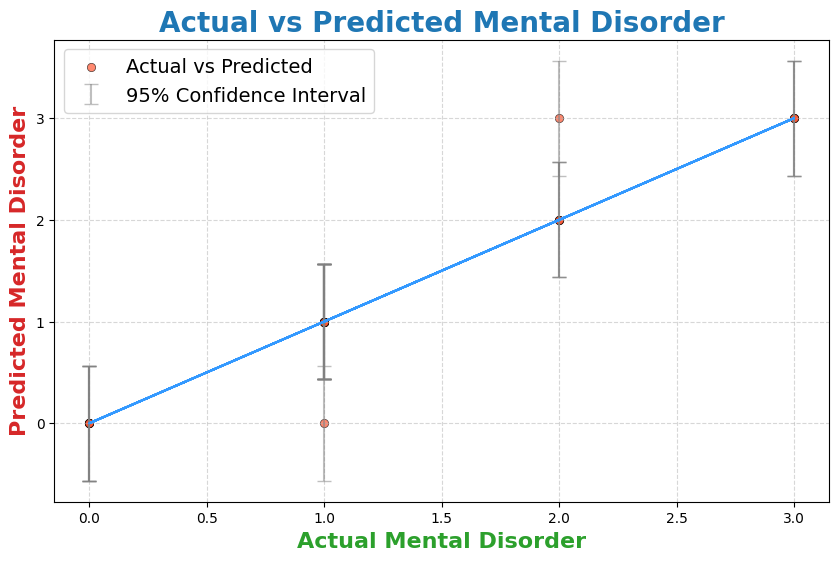

In [30]:
def plot_actual_vs_predicted(y_test, y_pred):
    """
    Plot actual vs predicted values with confidence intervals and error bars.

    Parameters:
    - y_test (array-like): Array of actual target values.
    - y_pred (array-like): Array of predicted target values.

    Returns:
    - None
    """
    # Calculate the residuals (difference between actual and predicted values)
    residuals = y_test - y_pred

    # Calculate the standard deviation of the residuals
    std_residuals = np.std(residuals)

    # Calculate the 95% confidence interval for the predicted values
    confidence_interval = 1.96 * std_residuals  # Assuming normal distribution

    # Set up the figure and axes
    plt.figure(figsize=(10, 6))

    # Scatter plot of actual vs predicted values
    scatter = plt.scatter(y_test, y_pred, color='#FF5733', alpha=0.7, label='Actual vs Predicted', edgecolor='black', linewidth=0.5)

    # Plot error bars for confidence interval
    error_bars = plt.errorbar(y_test, y_pred, yerr=confidence_interval, fmt='none', ecolor='#808080', capsize=5, alpha=0.5)

    # Plot the diagonal line for perfect predictions
    plt.plot(y_pred, y_pred, color='#3399FF', linestyle='--', label='Perfect Predictions')

    # Set title and labels
    plt.title('Actual vs Predicted Mental Disorder', fontsize=20, fontweight='bold', color='#1f77b4')
    plt.xlabel('Actual Mental Disorder', fontsize=16, fontweight='bold', color='#2ca02c')
    plt.ylabel('Predicted Mental Disorder', fontsize=16, fontweight='bold', color='#d62728')

    # Add legend with error bars and confidence interval
    plt.legend([scatter, error_bars], ['Actual vs Predicted', '95% Confidence Interval'], loc='upper left', fontsize=14)

    # Add grid
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.show()

# Example usage:
plot_actual_vs_predicted(y_test, y_pred_rf)
